In [7]:
from SpIn_Class import Spectra
from astropy import units as u
from matplotlib.pylab import plt
import numpy as np
from muler.igrins import IGRINSSpectrum
from muler.igrins import IGRINSSpectrumList

In [2]:
#Grabbing a test spectrum from the test_data folder
test_wavelength, test_spec = np.loadtxt('../test_data/HDR_LAE.txt', unpack = True)

In [3]:
#Instantiating our Spectra Class with test wavelength and spectra
our_spec = Spectra(test_wavelength, test_spec)

In [4]:
#Finding Emission Lines using our line_finding functions
#Setting the flux threshold equal to 1
lines = our_spec.line_finding(1, continuum=False)

In [5]:
print(lines)

line_center line_type  line_center_index
  Angstrom                              
----------- ---------- -----------------
     3502.0   emission                16
     3516.0   emission                23
     3542.0   emission                36
     3560.0   emission                45
     3574.0   emission                52
     3712.0   emission               121
     3734.0   emission               132
     3770.0   emission               150
     4016.0   emission               273
     4334.0   emission               432
     3506.0 absorption                18
     3580.0 absorption                55
     3606.0 absorption                68
     3650.0 absorption                90
     3740.0 absorption               135
     3780.0 absorption               155
     3996.0 absorption               263
     4046.0 absorption               288
     4068.0 absorption               299
     4718.0 absorption               624


   line_center     line_type  line_center_index
     Angstrom                                  
------------------ ---------- -----------------
16086.715836952408 absorption                15
 16091.26216089706 absorption                54
16095.899971184452 absorption                94
 16100.62780311558 absorption               135
16101.547285249642 absorption               143
16105.444205964908 absorption               177
16107.157881911835 absorption               192
16107.728357437749 absorption               197
16108.526395788911 absorption               204
16109.209847595876 absorption               210
16110.234022797558 absorption               219
 16115.22393094993 absorption               263
 16120.29817325993 absorption               308
16122.207575738094 absorption               325
16132.581660203869 absorption               418
16163.341698948616 absorption               700
 16170.82556632964 absorption               770
16204.244783483105 absorption           

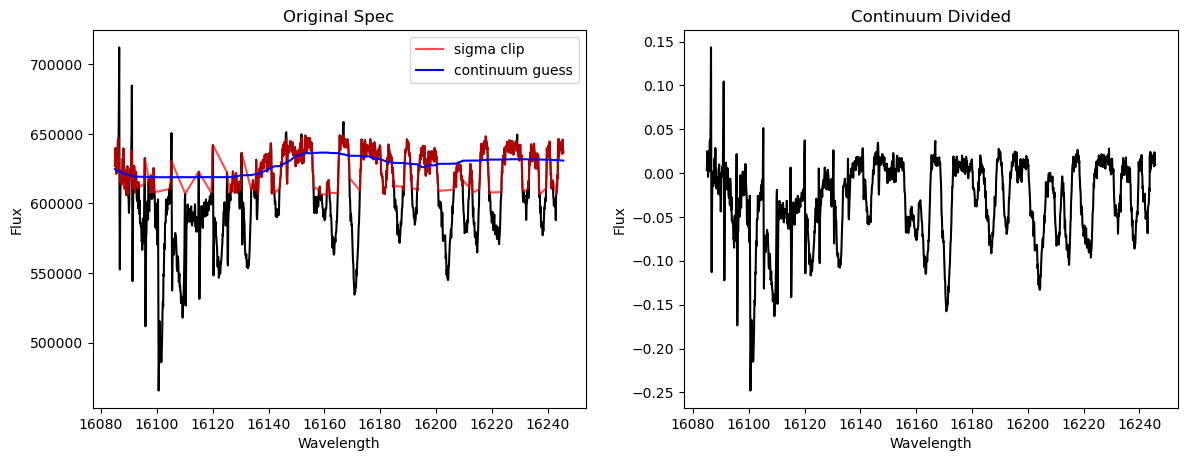

In [9]:
test_spec = IGRINSSpectrumList.read("../test_data/SDCH_20201202_0059.spec_a0v.fits").trim_edges()[14]

our_spec = Spectra(test_spec.wavelength.value, test_spec.flux.value)
#Smoothing window of 401, needs to be odd
our_spec.continuum_fit(window = 401)

#Finding lines in IGRINS spectrum above or below flux threshold of.1
lines = our_spec.line_finding(0.1)
print(lines)

#Fits an emission line
our_spec.Fitting(16100.62780311558  * u.AA, 20 * u.AA, 5 * u.AA)

#Plots up the continuum fit to the IGRINS Spectrum
fig, ax = our_spec.plotting_continuum()
plt.show()